# Buisness Problem
## Record labels and music production companys are always looking for the next big hit. If you are able to predict which songs are able to be the next big song, or can reverse engineer what society likes, you would be able to engineer the perfect song.

## Additionally, music is a powerful marketing tool, and signifies current trends. If you can anticipate the direction that music, and hence social trends, are moving, there would be powerful implications for both the music industry, the advertising industry, and even investors who may speculate on the popularity of various fads and fashion trends. 

# Goals
## -To predict whether a given song is popular in its respective decade
## -To understand what features contribute to a song being a hit
## -To analyze how features/preferances change over time

In [558]:
import pandas as pd
import matplotlib.pyplot as plt

file_location_60s = "./data/dataset-of-60s.csv"
file_location_70s = "./data/dataset-of-70s.csv"
file_location_80s = "./data/dataset-of-80s.csv"
file_location_90s = "./data/dataset-of-90s.csv"
file_location_00s = "./data/dataset-of-00s.csv"
file_location_10s = "./data/dataset-of-10s.csv"

#file_location = "./data/movie_preference.csv"

df_60s = pd.read_csv(file_location_60s, delimiter = ',')
df_70s = pd.read_csv(file_location_70s, delimiter = ',')
df_80s = pd.read_csv(file_location_80s, delimiter = ',')
df_90s = pd.read_csv(file_location_90s, delimiter = ',')
df_00s = pd.read_csv(file_location_00s, delimiter = ',')
df_10s = pd.read_csv(file_location_10s, delimiter = ',')

#print(column_names)
df_90s.head()

#/Users/brandtlawson/Desktop/INFO 577/untitled folder/the-spotify-hit-predictor-dataset-2/dataset-of-00s.csv

track           artist  \
0                                     Misty Roses  Astrud Gilberto   
1                                      Never Ever       All Saints   
2                                     Soul Sermon    Gregg Karukas   
3                       Clarinet Marmalade - Live    Alton Purnell   
4  До смерті і довше - Drum & Base and Rock Remix         Skryabin   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:50RBM1j1Dw7WYmsGsWg9Tm         0.527   0.316    1   -15.769   
1  spotify:track:5FTz9qQ94PyUHETyAyfYZN         0.738   0.541    1    -5.485   
2  spotify:track:6m24oe3lk1UMxq9zq4iPFi         0.736   0.419    0   -10.662   
3  spotify:track:5FOXuiLI6knVtgMUjWKj6x         0.565   0.594    5   -13.086   
4  spotify:track:6CxyIPTqSPvAPXfrIZczs4         0.513   0.760    4   -10.077   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0310      0.693000           0.00699    0.1680    0.543   
1     1       0.0311      0.559000           0.00000    0.0492    0.309   
2     1       0.0300      0.693000           0.49500    0.0809    0.265   
3     1       0.0646      0.655000           0.92600    0.6750    0.763   
4     1       0.0355      0.000017           0.00339    0.1530    0.961   

     tempo  duration_ms  time_signature  chorus_hit  sections  target  
0  116.211       158840               4    53.89523         6       0  
1  134.187       387573               4    32.16853        16       1  
2   93.982       237267               4    42.05369         9       0  
3  114.219       375933               4    80.99693        10       0  
4  153.166       430653               4    25.57331        20       0

In [389]:
#lets check to see if there are any missing values in our data set
print(df_90s.isnull().sum())

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64


## An example of how we would impute data if there were missing values

In [319]:
#if there were any missing values, you would need to impute them. I think that a knn imputor would be suitable
# for a dataset consisting of music, since songs within similar genras typically would have faily simillar
#features, i.e. metal music is commanly loud, pop music is commonly short in duration. 
import numpy as np
from sklearn.impute import KNNImputer
# the optimaly choice for number of neighbors could be determined via grid search, however here lets use
# 3 since it is for demonstations purposed and 3 is a comonly used value of k for knn.
imputer = KNNImputer(n_neighbors=3, weights="uniform")
imputed_df = imputer.fit_transform(df_90s.iloc[:,3:]) #for demonstation purposed

# Data Exploration Phase

## In this cell we can look at the characteristics of hits over time:

In [19]:
#in this cell use df_90s.describe or df_90s.mean to look at the mean features of hits, and do it for each year.
#Do it for only the hit tracks

print(df_10s[df_10s['target']==1]['loudness'].mean())
print(df_10s[df_10s['target']==0]['loudness'].mean(),"\n")

print(df_00s[df_00s['target']==1]['loudness'].mean())
print(df_00s[df_00s['target']==0]['loudness'].mean(),"\n")

print(df_90s[df_90s['target']==1]['loudness'].mean())
print(df_90s[df_90s['target']==0]['loudness'].mean(),"\n")

print(df_80s[df_80s['target']==1]['loudness'].mean())
print(df_80s[df_80s['target']==0]['loudness'].mean(),"\n")

print(df_90s[df_70s['target']==1]['loudness'].mean())
print(df_90s[df_70s['target']==0]['loudness'].mean(),"\n")

print(df_90s[df_60s['target']==1]['loudness'].mean())
print(df_90s[df_60s['target']==0]['loudness'].mean(),"\n")

-5.875752735229764
-9.303839949984376 

-5.677296321525886
-9.221219686648483 

-8.522603623188411
-11.947619565217385 

-9.876751881876087
-12.207036479444083 

-10.221407163742688
-10.248579741379316 

-10.358620765832093
-10.11547860199716 



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


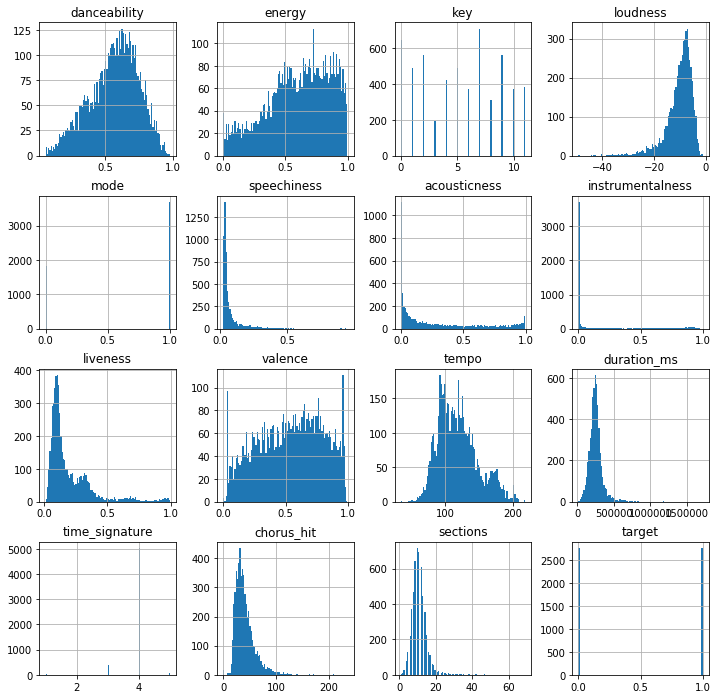

In [115]:
#in this cell, we can examine the distrobution of the veraious features
fig, axes = plt.subplots(len(df_90s.columns)//4, 4, figsize=(12, 12))
for col, axis in zip(df_90s.columns[3:], axes.flatten()):
    df_90s.hist(column = col, bins = 100, ax=axis)

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


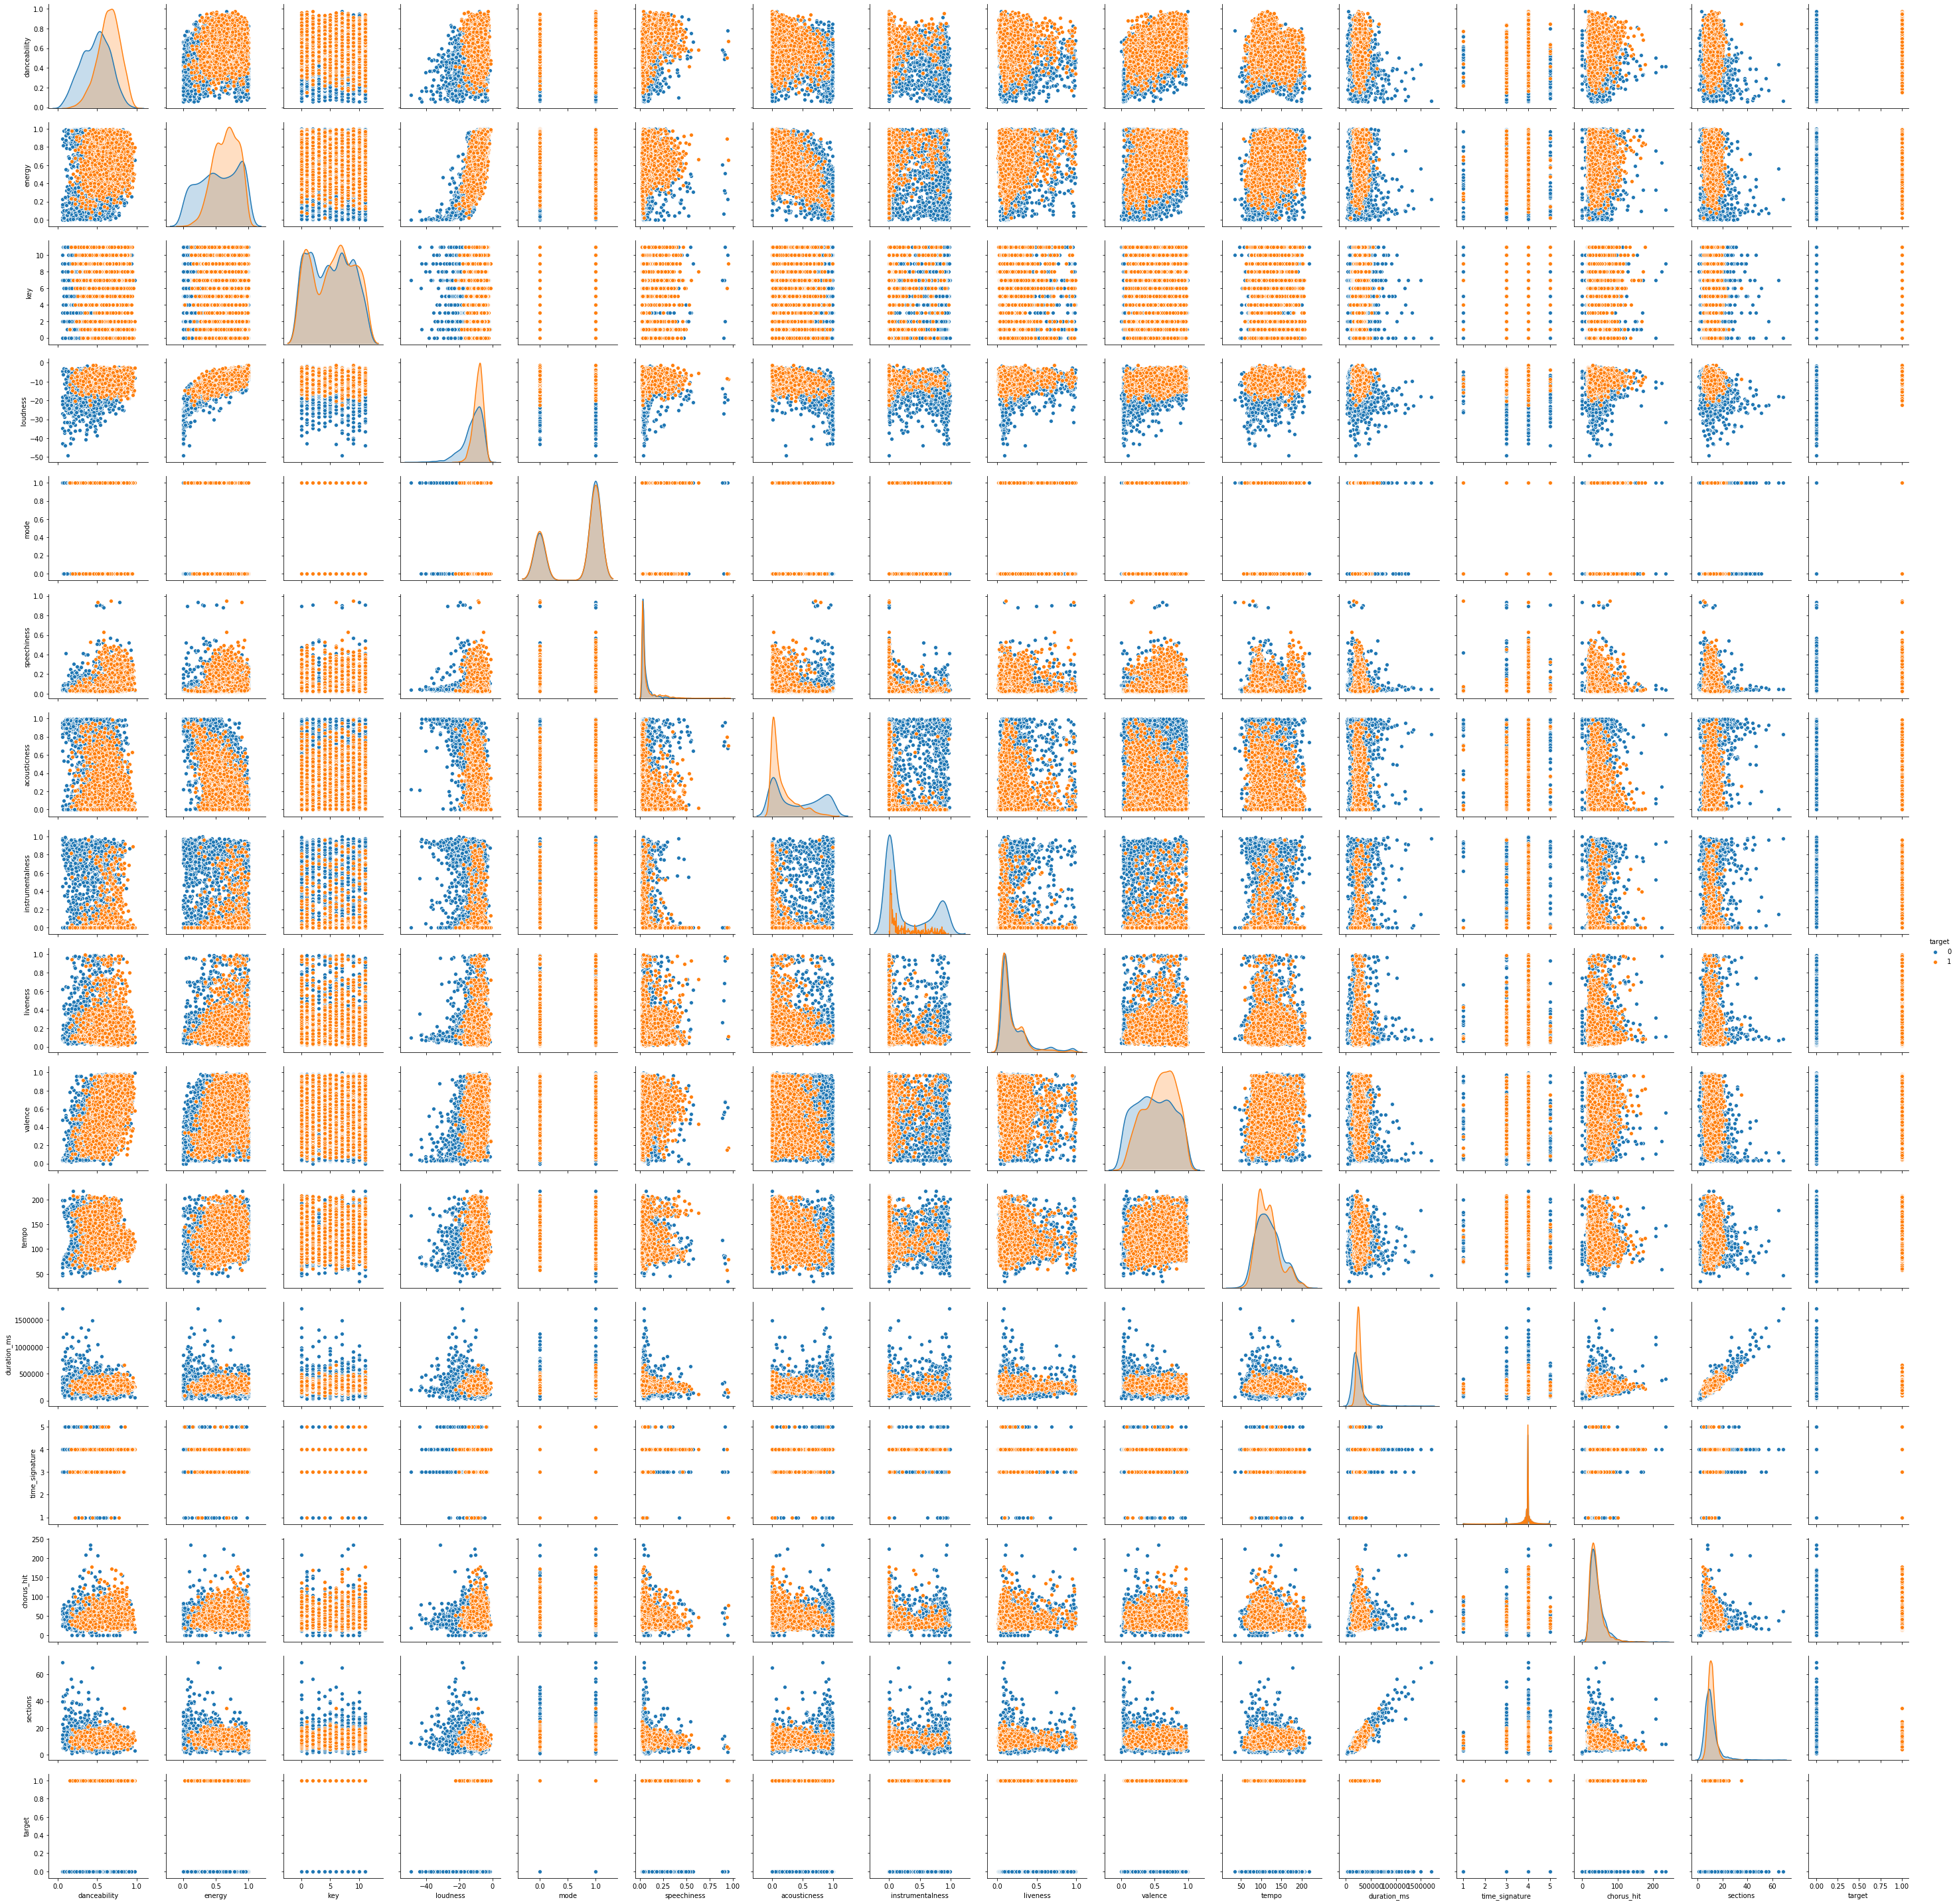

In [116]:
#import seaborn as sns
#sns.pairplot(df.iloc[3])
sns.pairplot(df_90s.iloc[3:], hue="target");

## Now lets do some standardization and normalization

In [559]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_90s.iloc[:,3:-1] = scaler.fit_transform(df_90s.iloc[:,3:-1])
#df.iloc[:,3:-1].head()
df_90s.iloc[:,3:].mean(axis = 0) #uncomment to check that the mean of each feature is 0 (it is)
df_90s.iloc[:,3:].std(axis = 0)  #uncomment to check that the std of each feature is 1 (it is)

danceability        1.000091
energy              1.000091
key                 1.000091
loudness            1.000091
mode                1.000091
speechiness         1.000091
acousticness        1.000091
instrumentalness    1.000091
liveness            1.000091
valence             1.000091
tempo               1.000091
duration_ms         1.000091
time_signature      1.000091
chorus_hit          1.000091
sections            1.000091
target              0.500045
dtype: float64

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


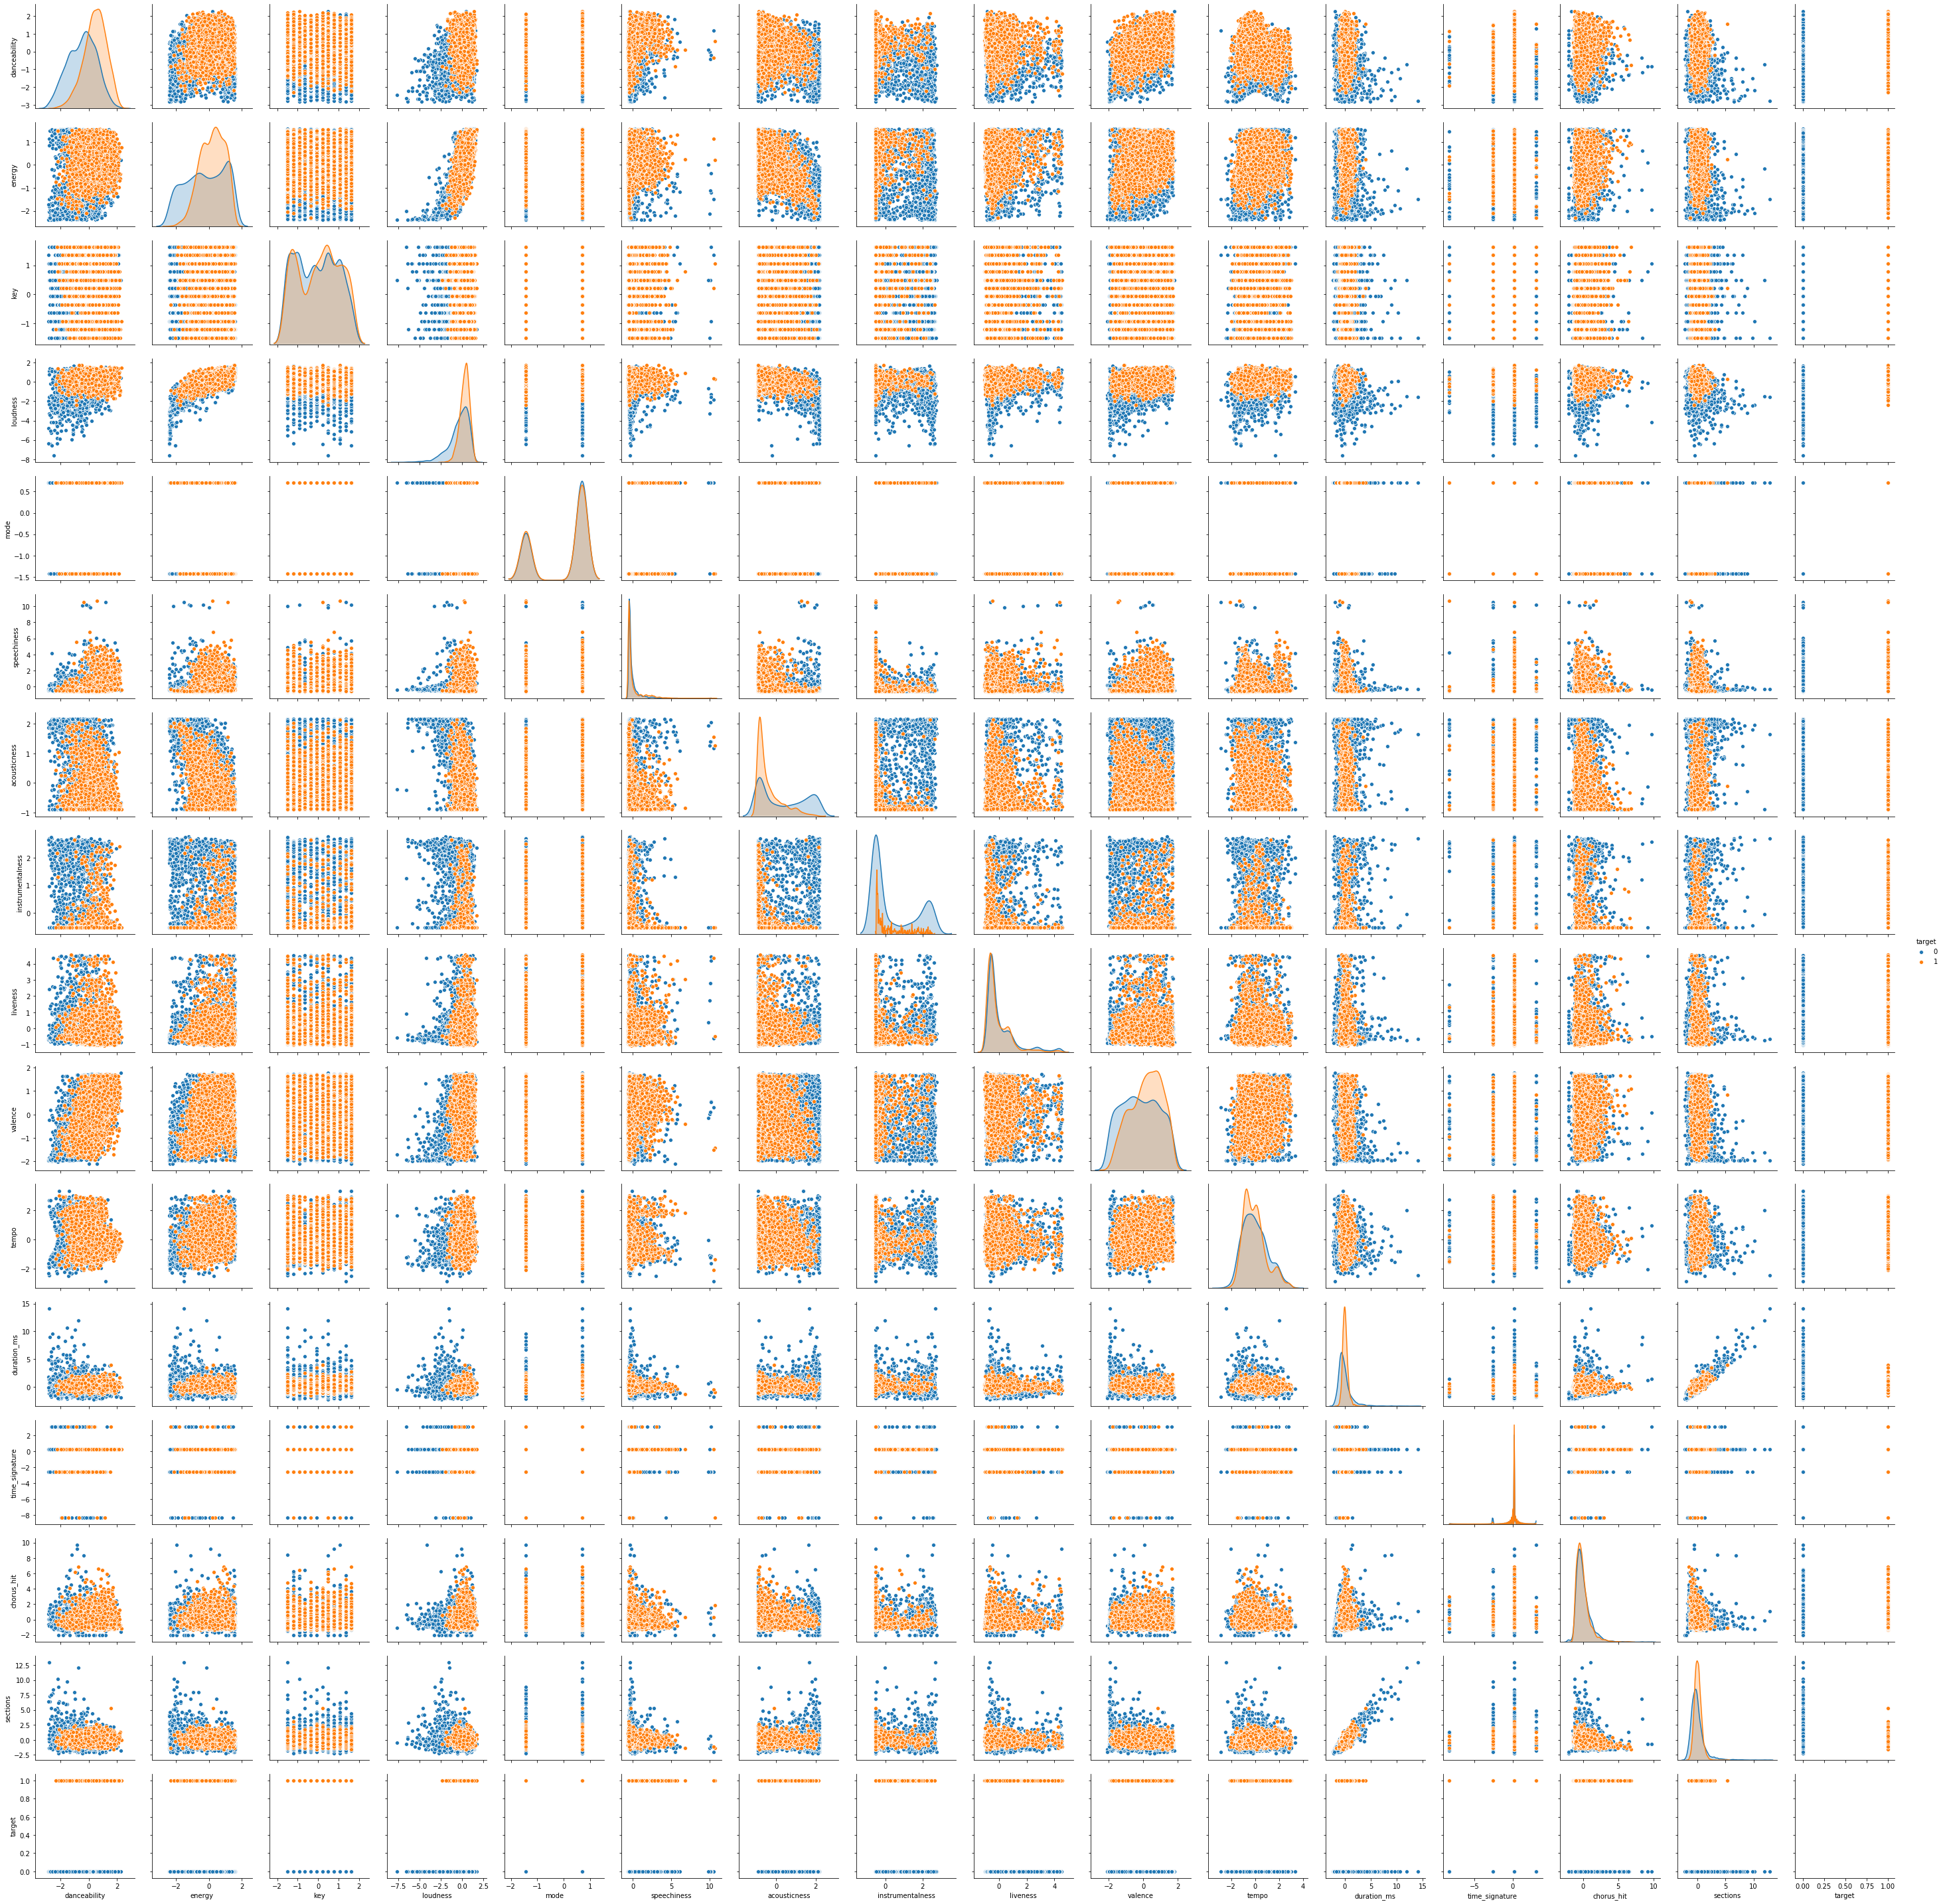

In [118]:
#This single line of code tell a thousand stories
#the dancability vs loudness square shows that the "hits" are very densely focused towards short and loud songs
#I wonder how these relationships will change decade by decade? 
sns.pairplot(df_90s.iloc[3:], hue="target");

In [238]:
print("90s")
sns.scatterplot(df_90s["loudness"],df_90s["duration_ms"], hue = "target", data = df_90s)
plt.show()

90s


NameError: name 'sns' is not defined

### In this cell we can look at the feature importances, and how they change over time

# Modeling

## Now I'm going to try several different models which I think may be appropriate for the data, and evaluate their performance.

## Baseline Models

In [391]:
from sklearn.model_selection import train_test_split

X_baseline = df_90s.iloc[:,3:-1]
Y_baseline = df_90s.iloc[:,-1]

x_train_baseline, x_test_baseline, y_train_baseline, y_test_baseline = train_test_split(X_baseline, Y_baseline, test_size = 0.2, random_state=5)

#
#my_tree_helper(X,y,test_size)
#return error

In [523]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


num_iterations = 1
error_list=[0]*num_iterations
average_baseline_error=0
for i in range(num_iterations):
    rf = RandomForestClassifier()
    rf.fit(x_train_baseline, y_train_baseline)
    y_pred_baseline = rf.predict(x_test_baseline)
    wrong = sum(abs(y_test_baseline-y_pred_baseline))
    correct_pred_baseline = 100*wrong/len(y_pred_baseline)
    error_list[i] = correct_pred_baseline
print(error_list)
average_baseline_error = sum(error_list)/num_iterations

print("The model performance for baseline Random Forrest model is:")
print("---------------------------------------------")
print('mean absoulte error is {}%'.format(round(average_baseline_error,2)))

gb = GradientBoostingClassifier()
error_list=[0]*100
average_baseline_error=0

gb.fit(x_train_baseline, y_train_baseline)
y_pred_gb_baseline = gb.predict(x_test_baseline)
wrong = sum(abs(y_test_baseline-y_pred_gb_baseline))
correct_pred_baseline = 100*wrong/len(y_pred_gb_baseline)
#error_list[i] = correct_pred_baseline
print("The model performance for baseline Gradient Boosting Classifier model is:")
print("---------------------------------------------")
print('mean absoulte error is {}%'.format(round(correct_pred_baseline,2)))


[16.485507246376812]
The model performance for baseline Random Forrest model is:
---------------------------------------------
mean absoulte error is 16.49%
The model performance for baseline Gradient Boosting Classifier model is:
---------------------------------------------
mean absoulte error is 14.95%


# Feature Engineering and feature importance

In [560]:
from itertools import combinations
import seaborn as sns

combi = combinations([4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], 2)


for i in list(combi): 
    #temp_df["interaction of " + str(df_90s.columns[i[0]] ) + " * " + str(df_90s.columns[i[1]] ) ] = df_90s.iloc[:,i[0]] * df_90s.iloc[:,i[1]]
    df_90s.insert(18, "interaction of " + str(df_90s.columns[i[0]] ) + " * " + str(df_90s.columns[i[1]] ) , df_90s.iloc[:,i[0]] * df_90s.iloc[:,i[1]])
    print(df_90s.head())
    #print("interaction of " + str(df_90s.columns[i[0]] ) + " * " + str(df_90s.columns[i[1]]) +"\n")
    
df_90s.head()

                                            track           artist  \
0                                     Misty Roses  Astrud Gilberto   
1                                      Never Ever       All Saints   
2                                     Soul Sermon    Gregg Karukas   
3                       Clarinet Marmalade - Live    Alton Purnell   
4  До смерті і довше - Drum & Base and Rock Remix         Skryabin   

                                    uri  danceability    energy       key  \
0  spotify:track:50RBM1j1Dw7WYmsGsWg9Tm     -0.221190 -1.135149 -1.214175   
1  spotify:track:5FTz9qQ94PyUHETyAyfYZN      0.948714 -0.242881 -1.214175   
2  spotify:track:6m24oe3lk1UMxq9zq4iPFi      0.937625 -0.726688 -1.498990   
3  spotify:track:5FOXuiLI6knVtgMUjWKj6x     -0.010496 -0.032702 -0.074919   
4  spotify:track:6CxyIPTqSPvAPXfrIZczs4     -0.298814  0.625593 -0.359733   

   loudness    mode  speechiness  acousticness  instrumentalness  liveness  \
0 -1.081538  0.7025    -0.524527      

                                            track           artist  \
0                                     Misty Roses  Astrud Gilberto   
1                                      Never Ever       All Saints   
2                                     Soul Sermon    Gregg Karukas   
3                       Clarinet Marmalade - Live    Alton Purnell   
4  До смерті і довше - Drum & Base and Rock Remix         Skryabin   

                                    uri  danceability    energy       key  \
0  spotify:track:50RBM1j1Dw7WYmsGsWg9Tm     -0.221190 -1.135149 -1.214175   
1  spotify:track:5FTz9qQ94PyUHETyAyfYZN      0.948714 -0.242881 -1.214175   
2  spotify:track:6m24oe3lk1UMxq9zq4iPFi      0.937625 -0.726688 -1.498990   
3  spotify:track:5FOXuiLI6knVtgMUjWKj6x     -0.010496 -0.032702 -0.074919   
4  spotify:track:6CxyIPTqSPvAPXfrIZczs4     -0.298814  0.625593 -0.359733   

   loudness    mode  speechiness  acousticness  ...  \
0 -1.081538  0.7025    -0.524527      1.237767  ...   
1  0.9

                                            track           artist  \
0                                     Misty Roses  Astrud Gilberto   
1                                      Never Ever       All Saints   
2                                     Soul Sermon    Gregg Karukas   
3                       Clarinet Marmalade - Live    Alton Purnell   
4  До смерті і довше - Drum & Base and Rock Remix         Skryabin   

                                    uri  danceability    energy       key  \
0  spotify:track:50RBM1j1Dw7WYmsGsWg9Tm     -0.221190 -1.135149 -1.214175   
1  spotify:track:5FTz9qQ94PyUHETyAyfYZN      0.948714 -0.242881 -1.214175   
2  spotify:track:6m24oe3lk1UMxq9zq4iPFi      0.937625 -0.726688 -1.498990   
3  spotify:track:5FOXuiLI6knVtgMUjWKj6x     -0.010496 -0.032702 -0.074919   
4  spotify:track:6CxyIPTqSPvAPXfrIZczs4     -0.298814  0.625593 -0.359733   

   loudness    mode  speechiness  acousticness  ...  \
0 -1.081538  0.7025    -0.524527      1.237767  ...   
1  0.9

                                            track           artist  \
0                                     Misty Roses  Astrud Gilberto   
1                                      Never Ever       All Saints   
2                                     Soul Sermon    Gregg Karukas   
3                       Clarinet Marmalade - Live    Alton Purnell   
4  До смерті і довше - Drum & Base and Rock Remix         Skryabin   

                                    uri  danceability    energy       key  \
0  spotify:track:50RBM1j1Dw7WYmsGsWg9Tm     -0.221190 -1.135149 -1.214175   
1  spotify:track:5FTz9qQ94PyUHETyAyfYZN      0.948714 -0.242881 -1.214175   
2  spotify:track:6m24oe3lk1UMxq9zq4iPFi      0.937625 -0.726688 -1.498990   
3  spotify:track:5FOXuiLI6knVtgMUjWKj6x     -0.010496 -0.032702 -0.074919   
4  spotify:track:6CxyIPTqSPvAPXfrIZczs4     -0.298814  0.625593 -0.359733   

   loudness    mode  speechiness  acousticness  ...  \
0 -1.081538  0.7025    -0.524527      1.237767  ...   
1  0.9

track           artist  \
0                                     Misty Roses  Astrud Gilberto   
1                                      Never Ever       All Saints   
2                                     Soul Sermon    Gregg Karukas   
3                       Clarinet Marmalade - Live    Alton Purnell   
4  До смерті і довше - Drum & Base and Rock Remix         Skryabin   

                                    uri  danceability    energy       key  \
0  spotify:track:50RBM1j1Dw7WYmsGsWg9Tm     -0.221190 -1.135149 -1.214175   
1  spotify:track:5FTz9qQ94PyUHETyAyfYZN      0.948714 -0.242881 -1.214175   
2  spotify:track:6m24oe3lk1UMxq9zq4iPFi      0.937625 -0.726688 -1.498990   
3  spotify:track:5FOXuiLI6knVtgMUjWKj6x     -0.010496 -0.032702 -0.074919   
4  spotify:track:6CxyIPTqSPvAPXfrIZczs4     -0.298814  0.625593 -0.359733   

   loudness    mode  speechiness  acousticness  ...  \
0 -1.081538  0.7025    -0.524527      1.237767  ...   
1  0.928358  0.7025    -0.523307      0.824952  ...   
2 -0.083431  0.7025    -0.536727      1.237767  ...   
3 -0.557175  0.7025    -0.114628      1.120700  ...   
4  0.030901  0.7025    -0.469630     -0.897109  ...   

   interaction of energy * tempo  interaction of energy * valence  \
0                       0.101225                        -0.023413   
1                      -0.126409                         0.215564   
2                       0.612624                         0.769051   
3                       0.005125                        -0.028596   
4                       0.728253                         1.027780   

   interaction of energy * liveness  interaction of energy * instrumentalness  \
0                          0.189901                                  0.570209   
1                          0.205932                                  0.127582   
2                          0.484170                                 -0.800065   
3                         -0.089513                                 -0.082310   
4                         -0.158415                                 -0.321648   

   interaction of energy * acousticness  interaction of energy * speechiness  \
0                             -1.405049                             0.595417   
1                             -0.200365                             0.127101   
2                             -0.899471                             0.390033   
3                             -0.036649                             0.003749   
4                             -0.561225                            -0.293797   

   interaction of energy * mode  interaction of energy * loudness  \
0                     -0.797442                          1.227707   
1                     -0.170624                         -0.225480   
2                     -0.510499                          0.060628   
3                     -0.022973                          0.018221   
4                      0.439479                          0.019332   

   interaction of energy * key  target  
0                     1.378270       0  
1                     0.294900       1  
2                     1.089298       0  
3                     0.002450       0  
4                    -0.225046       0  

[5 rows x 97 columns]

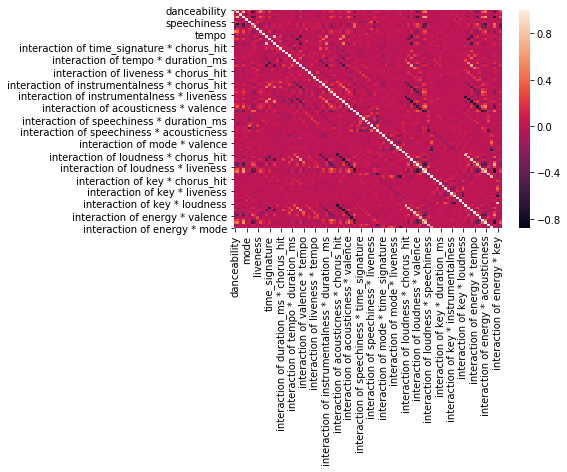

# Hyperparameter tuning

In [561]:
X = df_90s.iloc[:,3:-1]
Y = df_90s.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [538]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1, 2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [1, 2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [544]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=20, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train,y_train)

rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [555]:
gb = GradientBoostingClassifier()
random_grid = {'learning_rate': [.01,10],
                  'subsample'    : [.01,.02,.1,1,10,100],
                  'n_estimators' : [10,100, 200, 500, 1000],
                  'max_depth'    : [1,10,100]
                 }
#random_grid = {
    
                #'learning_rate': list(np.linspace(10, 100, 1, dtype = float)/1000),
                #'n_estimators': list(np.linspace(10, 5000, 10, dtype = int))
                #}
gb_random = RandomizedSearchCV(estimator = gb, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=20, random_state=42, n_jobs = -1)
# Fit the random search model
gb_random.fit(x_train,y_train)

gb_random.best_params_
x_train.head()

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  1

danceability  acousticness  instrumentalness  duration_ms  \
470      -0.182378      0.060937         -0.525285    -0.485718   
3723      0.377623     -0.734809         -0.524898    -1.008968   
4983      0.344356     -0.828462         -0.523958    -0.090728   
4646      0.959803     -0.856805         -0.525285    -0.315923   
1134     -1.213667     -0.832775         -0.256542     1.985123   

      interaction of duration_ms * time_signature  \
470                                      1.270233   
3723                                    -0.221785   
4983                                    -0.019943   
4646                                    -0.069444   
1134                                     0.436357   

      interaction of instrumentalness * time_signature  \
470                                           1.373708   
3723                                         -0.115380   
4983                                         -0.115173   
4646                                         -0.115465   
1134                                         -0.056391   

      interaction of instrumentalness * duration_ms  \
470                                        0.255141   
3723                                       0.529605   
4983                                       0.047537   
4646                                       0.165950   
1134                                      -0.509267   

      interaction of instrumentalness * valence  \
470                                   -0.860946   
3723                                  -0.100460   
4983                                  -0.328031   
4646                                  -0.600001   
1134                                  -0.019230   

      interaction of acousticness * time_signature  \
470                                      -0.159361   
3723                                     -0.161521   
4983                                     -0.182107   
4646                                     -0.188337   
1134                                     -0.183055   

      interaction of acousticness * valence  \
470                                0.099877   
3723                              -0.140635   
4983                              -0.518670   
4646                              -0.978674   
1134                              -0.062425   

      interaction of acousticness * instrumentalness  \
470                                        -0.032010   
3723                                        0.385699   
4983                                        0.434079   
4646                                        0.450067   
1134                                        0.213642   

      interaction of speechiness * instrumentalness  \
470                                        0.242845   
3723                                       0.288130   
4983                                       0.125897   
4646                                       0.206318   
1134                                      -0.143976   

      interaction of loudness * acousticness  \
470                                 0.014483   
3723                               -1.065318   
4983                               -0.211316   
4646                               -0.513932   
1134                               -0.031756   

      interaction of energy * instrumentalness  \
470                                  -0.101558   
3723                                 -0.503223   
4983                                 -0.184415   
4646                                 -0.332781   
1134                                  0.015511   

      interaction of energy * acousticness  
470                               0.011782  
3723                             -0.704466  
4983                             -0.291589  
4646                             -0.542807  
1134                              0.050351

In [562]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(**rf_random.best_params_), threshold='1.25*median')
embeded_rf_selector.fit(x_train, y_train)
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = x_train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')
#print("Selected Feature:",embeded_rf_feature)

38 selected features


In [564]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier

embeded_gb_selector = SelectFromModel(GradientBoostingClassifier(**gb_random.best_params_), threshold='1.25*median')
embeded_gb_selector.fit(x_train, y_train)
embeded_gb_support = embeded_gb_selector.get_support()
embeded_gb_feature = x_train.loc[:,embeded_gb_support].columns.tolist()
print(str(len(embeded_gb_feature)), 'selected features')
#print("Selected Feature:",embeded_rf_feature)

42 selected features


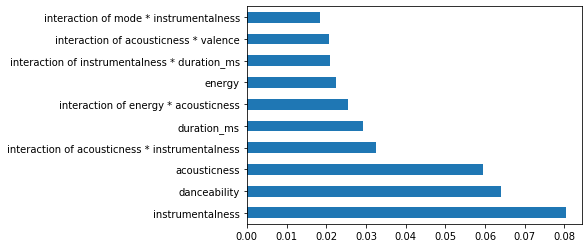

In [422]:
X = df_90s.iloc[:,3:-1]  #independent columns
y = df_90s.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier(n_estimators=600,min_samples_split=2,min_samples_leaf=2,max_features="auto",max_depth=60,bootstrap=False)
model.fit(X,y)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#print(type(feat_importances.nlargest(32)))
feature_list = feat_importances.nlargest(10)

In [565]:
import numpy as np
#mylist = np.array(feature_list.index.values).tolist()
#mylist.append("target")
#print(mylist)
embeded_rf_feature.append("target")
embeded_gb_feature.append("target")
#print(embeded_rf_feature)

In [509]:
#print(df_90s["track"])
#print(feature_list.index.values)
#feature_list = feature_list.index.values
print(feature_list)
for column in df_90s.columns:
    if column not in embeded_rf_feature:
        #print(column)
        df_90s = df_90s.drop(column, axis=1)
#df_90s.head()

instrumentalness                                  0.080308
danceability                                      0.063913
acousticness                                      0.059369
interaction of acousticness * instrumentalness    0.032630
duration_ms                                       0.029377
interaction of energy * acousticness              0.025583
energy                                            0.022567
interaction of instrumentalness * duration_ms     0.020955
interaction of acousticness * valence             0.020794
interaction of mode * instrumentalness            0.018427
dtype: float64
energy
loudness
speechiness
valence
sections
interaction of duration_ms * chorus_hit
interaction of tempo * duration_ms
interaction of valence * time_signature
interaction of valence * duration_ms
interaction of acousticness * duration_ms
interaction of acousticness * liveness
interaction of speechiness * time_signature
interaction of speechiness * valence
interaction of mode * duration_ms
in

danceability  acousticness  instrumentalness  duration_ms  \
0     -0.221190      1.237767         -0.502321    -0.941416   
1      0.948714      0.824952         -0.525285     1.270052   
2      0.937625      1.237767          1.100974    -0.183157   
3     -0.010496      1.120700          2.516970     1.157513   
4     -0.298814     -0.897109         -0.514148     1.686564   

   interaction of duration_ms * time_signature  \
0                                    -0.206936   
1                                     0.279175   
2                                    -0.040260   
3                                     0.254437   
4                                     0.370730   

   interaction of instrumentalness * time_signature  \
0                                         -0.110417   
1                                         -0.115465   
2                                          0.242009   
3                                          0.553264   
4                                         -0.113017   

   interaction of instrumentalness * duration_ms  \
0                                       0.472893   
1                                      -0.667140   
2                                      -0.201651   
3                                       2.913425   
4                                      -0.867144   

   interaction of instrumentalness * valence  \
0                                  -0.010361   
1                                   0.466207   
2                                  -1.165155   
3                                   2.200959   
4                                  -0.844687   

   interaction of acousticness * time_signature  \
0                                      0.272078   
1                                      0.181336   
2                                      0.272078   
3                                      0.246345   
4                                     -0.197197   

   interaction of acousticness * valence  \
0                               0.025530   
1                              -0.732170   
2                              -1.309922   
3                               0.979994   
4                              -1.473849   

   interaction of acousticness * instrumentalness  \
0                                       -0.621756   
1                                       -0.433335   
2                                        1.362749   
3                                        2.820767   
4                                        0.461247   

   interaction of speechiness * instrumentalness  \
0                                       0.263481   
1                                       0.274886   
2                                      -0.590922   
3                                      -0.288514   
4                                       0.241459   

   interaction of loudness * acousticness  \
0                               -1.338692   
1                                0.765851   
2                               -0.103268   
3                               -0.624426   
4                               -0.027722   

   interaction of energy * instrumentalness  \
0                                  0.570209   
1                                  0.127582   
2                                 -0.800065   
3                                 -0.082310   
4                                 -0.321648   

   interaction of energy * acousticness  target  
0                             -1.405049       0  
1                             -0.200365       1  
2                             -0.899471       0  
3                             -0.036649       0  
4                             -0.561225       0

In [566]:
#print(df_90s["track"])
#print(feature_list.index.values)
#feature_list = feature_list.index.values
#print(feature_list)
for column in df_90s.columns:
    if column not in embeded_gb_feature:
        #print(column)
        df_90s = df_90s.drop(column, axis=1)
#df_90s.head()

In [512]:
from sklearn.model_selection import train_test_split
X = df_90s.iloc[:,:-1]
Y = df_90s.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(**rf_random.best_params_)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

#
#my_tree_helper(X,y,test_size)
#return error
print("The model performance for baseline Random Forrest model is:")
print("---------------------------------------------")

wrong = sum(abs(y_test-y_pred))
correct_pred = 100*wrong/len(y_pred)
print('mean absoulte error is {}%'.format(round(correct_pred,2)))

The model performance for baseline Random Forrest model is:
---------------------------------------------
mean absoulte error is 16.85%


In [567]:
##GradientBoosting
gb = GradientBoostingClassifier()
error_list=[0]*100
average_baseline_error=0

gb.fit(x_train, y_train)
y_pred_gb = gb.predict(x_test)
wrong = sum(abs(y_test-y_pred_gb))
correct_pred = 100*wrong/len(y_pred_gb)
#error_list[i] = correct_pred_baseline
print("The model performance for baseline Gradient Boosting Classifier model is:")
print("---------------------------------------------")
print('mean absoulte error is {}%'.format(round(correct_pred,2)))

The model performance for baseline Gradient Boosting Classifier model is:
---------------------------------------------
mean absoulte error is 15.49%


In [316]:
#testing out using separate classes to clean up the project
from test_function import test_function
test_function("echome")

echome


'echome'

# GradientBoostingClassifier